### Student Information
Name: Pablo Nicolas Maldonado Lesme

Student ID: M11352803

GitHub ID: nicomaldox

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import ast
import re
import html
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
df = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')
df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


# Exercise 1

In [2]:
from sklearn.utils import Bunch
df_use = pd.read_csv(
    "newdataset/Reddit-stock-sentiment.csv",
    usecols=["title", "text", "sentiment", "upvotes","subjectivity","polarity","label"]
)


titles = df_use["title"].tolist()
texts = df_use["text"].tolist()
sentiment = df_use["sentiment"].astype(int).tolist()
upvotes = df_use["upvotes"].tolist()
subjectivity = df_use["subjectivity"].tolist()
polarity = df_use["polarity"].tolist()



labels = df_use["label"].map({-1: 0, 0: 1, 1: 2}).tolist()

target_names = ["Negative", "Neutral", "Positive"]

reddit_data = Bunch(
    data=texts,                
    sentiment=sentiment,        
    title=titles,           
    upvotes=upvotes,
    subjectivity=subjectivity,
    polarity=polarity,
    target=labels,
    target_names=target_names, 
)


In [3]:
len(reddit_data.data)

847

In [4]:
for x in reddit_data.target[:5]:
    print(reddit_data.target_names[x])

Negative
Neutral
Neutral
Positive
Negative


In [5]:
for idx, i in enumerate(reddit_data.data[:3]):
    print(f'Example {idx + 1}:')
    print(i)

Example 1:
Calls on retards
Example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3:
Seeing lots of red in the ticker.


### Preprocessing

In [6]:
import pandas as pd

import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(reddit_data), columns= ['text'])
X

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
...,...
842,Invest now it is going to shoot up tomorrow
843,Where can I read this?
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco..."
845,i sold my puts so i expect cheeto to declare w...


In [7]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [8]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


In [9]:
X['category'] = reddit_data.target

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, reddit_data))
X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,2,Positive
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative


In [10]:
X[-10:]

,text,category,category_name
837,Finance media lying \r \r *Surprise*,0,Negative
838,I am all in,1,Neutral
839,The Art of the Deal…,1,Neutral
840,Lol fr,1,Neutral
841,So countries “begging to stop the tariffs” and...,2,Positive
842,Invest now it is going to shoot up tomorrow,2,Positive
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [11]:
X[-10:]

,text,category,category_name
837,Finance media lying \r \r *Surprise*,0,Negative
838,I am all in,1,Neutral
839,The Art of the Deal…,1,Neutral
840,Lol fr,1,Neutral
841,So countries “begging to stop the tariffs” and...,2,Positive
842,Invest now it is going to shoot up tomorrow,2,Positive
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [12]:
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [13]:
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

# Exercise 2

In [14]:
print(X[:5][["text","category_name","category"]].query("category == 1"))

                                                text category_name  category
1  Stunt as in like why did they even make a big ...       Neutral         1
2                  Seeing lots of red in the ticker.       Neutral         1


In [15]:
print(X.iloc[0:10, 1])

0    0
1    1
2    1
3    2
4    0
5    1
6    0
7    1
8    2
9    2
Name: category, dtype: int64


# Exercise 3

In [16]:
X[X["category_name"]=="Positive"][::10][0:5]

,text,category,category_name
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
78,I think it’s gonna work itself out. I bought t...,2,Positive
168,The obvious can also be refreshing from CNBC: ...,2,Positive
219,Same. Back to break even after that last rip b...,2,Positive
319,Etrade has a feed of news articles about how r...,2,Positive


# Exercise 4

In [17]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [18]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [20]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [21]:
dummy_dataform = dummy_series.to_frame().T
dummy_dataform

,text,category
0,dummy_record,1


In [22]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)


result_with_series

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [23]:
len(result_with_series)

848

In [24]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [25]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)


X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [26]:
len(X)

848

In [27]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [28]:
target_names = ["Negative", "Neutral", "Positive"]
X.loc[X.index[-1], "category_name"] = target_names[X.iloc[-1]["category"]]


X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [29]:
target_names = ["Negative", "Neutral", "Positive"]
X.loc[X.index[-1], "category_name"] = target_names[X.iloc[-1]["category"]]


X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [30]:
sum(X.duplicated())

23

In [31]:
X_new = X.astype(str).drop_duplicates(keep=False)

In [32]:

len(X_new)

814

In [33]:
len(X)

848

In [34]:
sum(X_new.duplicated())

0

# Exercise 5


In [35]:
print('.isnull() didn’t work for "NaN", "None", and "" because those are strings,not actual missing values, if you want pandas to treat them as missing, you need to explicitly tell pandas that those strings are missing values')

.isnull() didn’t work for "NaN", "None", and "" because those are strings,not actual missing values, if you want pandas to treat them as missing, you need to explicitly tell pandas that those strings are missing values


In [36]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
843    False
844     True
845    False
846    False
847    False
Length: 848, dtype: bool

In [37]:
X_sample = X.sample(n=100) 


X_sample[0:4]

,text,category,category_name
136,"Nope, even if he drops all tariffs the loss of...",0,Negative
383,it never seems to go up even with great earnings,0,Negative
498,Thanks for the laugh during these times,1,Neutral
661,I see that your reading comprehension is still...,0,Negative


# Exercise 6


category_name
Neutral     424
Negative    315
Positive    109
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

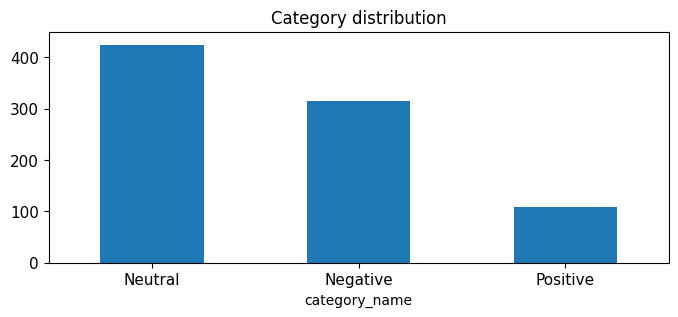

In [38]:
import matplotlib.pyplot as plt
print(X.category_name.value_counts())

X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 450],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
Neutral     53
Negative    39
Positive     8
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

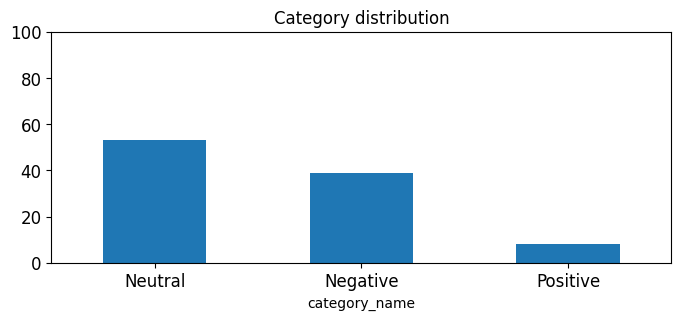

In [39]:
print(X_sample.category_name.value_counts()) 

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 100], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **Exercise 7**

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

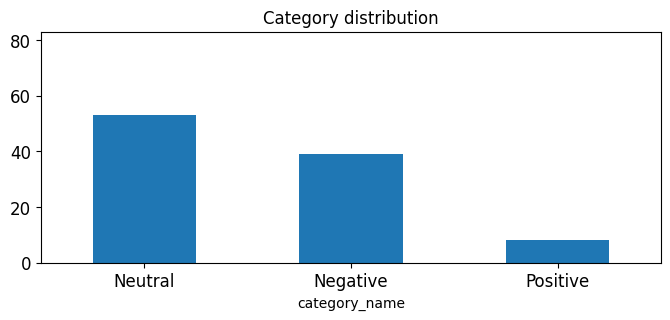

In [40]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0,X_sample.category_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

               original  sampled
category_name                   
Neutral             424       53
Negative            315       39
Positive            109        8


<Axes: title={'center': 'Category Distribution'}, xlabel='category_name'>

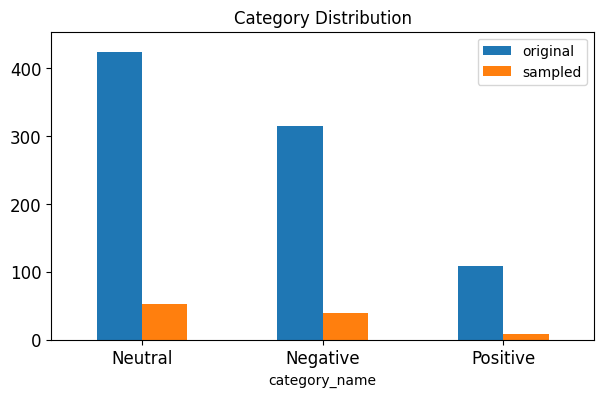

In [41]:
counts_X = X.category_name.value_counts()
counts_sample = X_sample.category_name.value_counts()

comparison_df = pd.DataFrame({
    "original": counts_X,
    "sampled": counts_sample
})



print(comparison_df)
comparison_df.plot(
    kind = 'bar',
    title = 'Category Distribution',
    ylim = [0,comparison_df.values.max()+30], 
    rot = 0, fontsize = 12, figsize = (7,4)
)

In [42]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


X

,text,category,category_name,unigrams
0,Calls on retards,0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,0,Negative,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...
843,Where can I read this?,1,Neutral,"[Where, can, I, read, this, ?]"
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral,"[Upgrades, ,, Downgrades, [, Stock, Analyst, R..."
845,i sold my puts so i expect cheeto to declare w...,0,Negative,"[i, sold, my, puts, so, i, expect, cheeto, to,..."
846,![img](emote|t5_2th52|31224),1,Neutral,"[!, [, img, ], (, emote|t5_2th52|31224, )]"


In [44]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [45]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 


print(X_counts)


  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2707))	1
  (np.int32(0), np.int32(3249))	1
  (np.int32(1), np.int32(3697))	1
  (np.int32(1), np.int32(388))	1
  (np.int32(1), np.int32(2025))	2
  (np.int32(1), np.int32(2311))	1
  (np.int32(1), np.int32(4245))	1
  (np.int32(1), np.int32(1168))	1
  (np.int32(1), np.int32(3859))	1
  (np.int32(1), np.int32(1410))	1
  (np.int32(1), np.int32(2403))	1
  (np.int32(1), np.int32(538))	1
  (np.int32(1), np.int32(1083))	1
  (np.int32(1), np.int32(175))	2
  (np.int32(1), np.int32(3629))	1
  (np.int32(1), np.int32(2162))	1
  (np.int32(1), np.int32(3849))	1
  (np.int32(1), np.int32(1569))	1
  (np.int32(1), np.int32(2879))	1
  (np.int32(1), np.int32(2646))	1
  (np.int32(1), np.int32(887))	1
  (np.int32(1), np.int32(3478))	1
  (np.int32(1), np.int32(1413))	2
  (np.int32(1), np.int32(3796))	1
  :	:
  (np.int32(843), np.int32(697))	1
  (np.int32(843), np.int32(4230))	1
  (np.int32(843), np.int32(3114))	1
  (np.int32(844), np.int32(3655))	1
  (np.

In [47]:
print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2707))	1
  (np.int32(0), np.int32(3249))	1


In [48]:
count_vect.get_feature_names_out()[1000]

'crashes'

In [49]:
analyze = count_vect.build_analyzer()

analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

# Exercise 9

In [50]:
analyze(X.text[0])


['calls', 'on', 'retards']

In [51]:
X_counts.shape

(848, 4347)

In [52]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [53]:
X_counts[0:5, 100:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

# Exercise 10

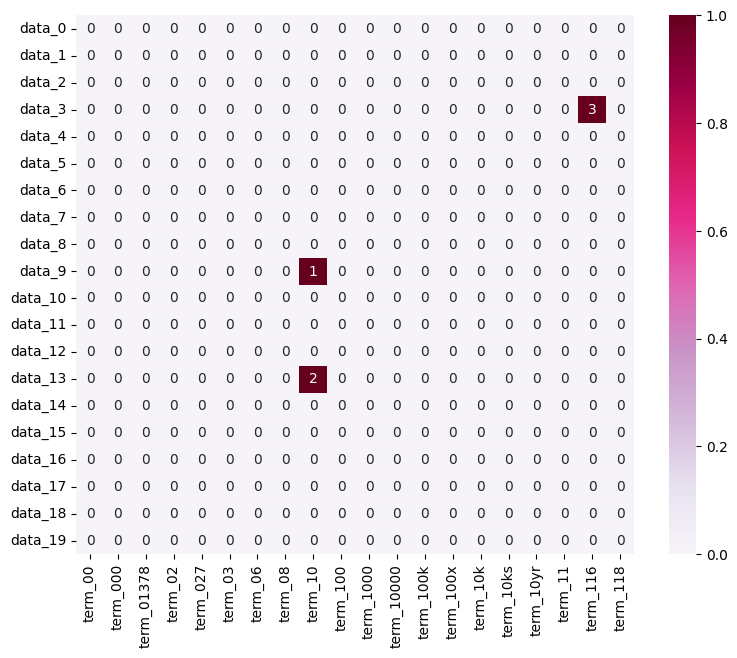

In [54]:
import seaborn as sns

sec_wordFrequency = X_counts[1, 100:200]

col_indices = sec_wordFrequency.nonzero()[1]

col_indices_plus_100 = col_indices + 100 
words = count_vect.get_feature_names_out()[col_indices_plus_100]

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

plot_y = ["data_"+ str(i) for i in list(X.index)[0:20]]
plot_y

plot_z = X_counts[0:20, 0:20].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Exercise 11

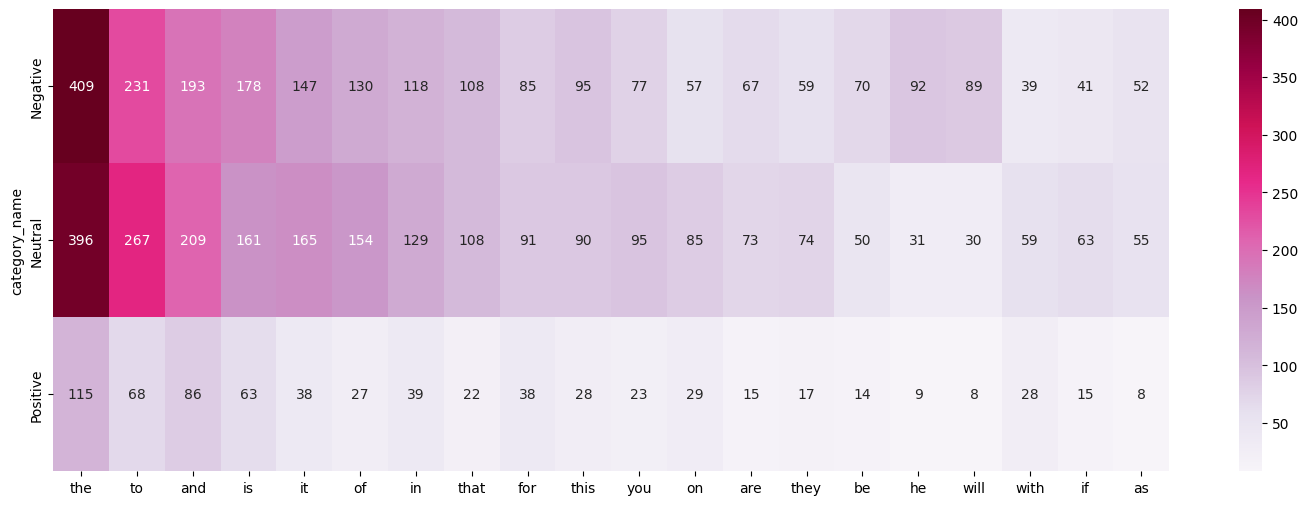

In [55]:
word_counts = pd.DataFrame(
    X_counts.toarray(),
    columns=count_vect.get_feature_names_out()
)
word_counts["category_name"] = X["category_name"]
category_term_matrix = word_counts.groupby("category_name").sum()
total_counts = category_term_matrix.sum(axis=0)

top_terms = total_counts.sort_values(ascending=False).head(20).index



category_top_terms = category_term_matrix[top_terms]
plt.figure(figsize=(18, 6))
ax = sns.heatmap(category_top_terms,
                 cmap="PuRd",
                 annot=True, fmt="d")

In [56]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [57]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([4, 6, 1, ..., 1, 1, 1])

In [58]:
term_frequencies[0] 

np.int64(4)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\877202317.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

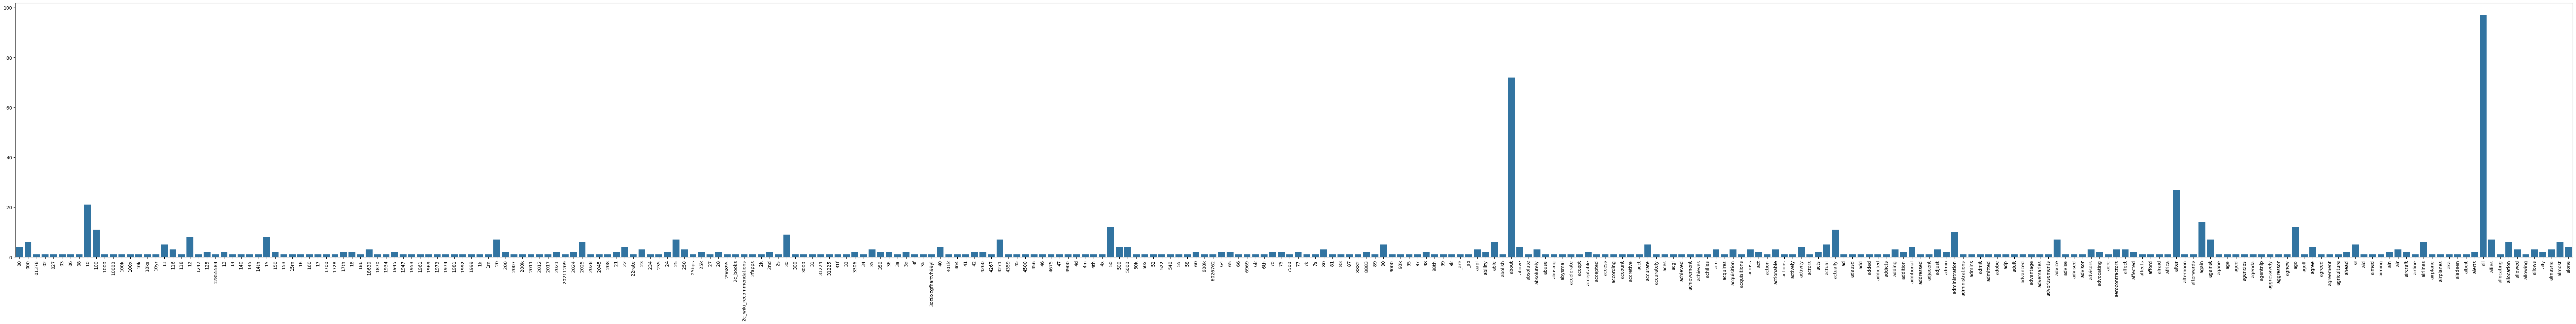

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300]) 
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

# Exercise 12

In [60]:
import plotly.express as px
import pandas as pd

term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False)

top_terms = term_freq_df.head(300)

fig = px.bar(top_terms,
             x="term",
             y="frequency",
             title="Top 300 Most Frequent Terms",
             labels={"term", "frequency"},
             template="plotly_white")

fig.update_layout(
    xaxis_tickangle=90,
    width=1400,
    height=600,
    bargap=0.2,
    font=dict(size=12)
)

fig.show()


# Exercise 13

In [61]:
import plotly.express as px
import pandas as pd

filtered_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False)
filtered_terms = filtered_terms[term_freq_df["frequency"] >= 30]

fig2 = px.bar(filtered_terms,
             x="term",
             y="frequency",
             title="terms in frequency",
             labels={"term", "frequency"},
             template="plotly_white")

fig2.update_layout(
    xaxis_tickangle=90,
    width=900,
    height=500,
    bargap=0.2,
    font=dict(size=12)
)

fig2.show()

# Exercise 14

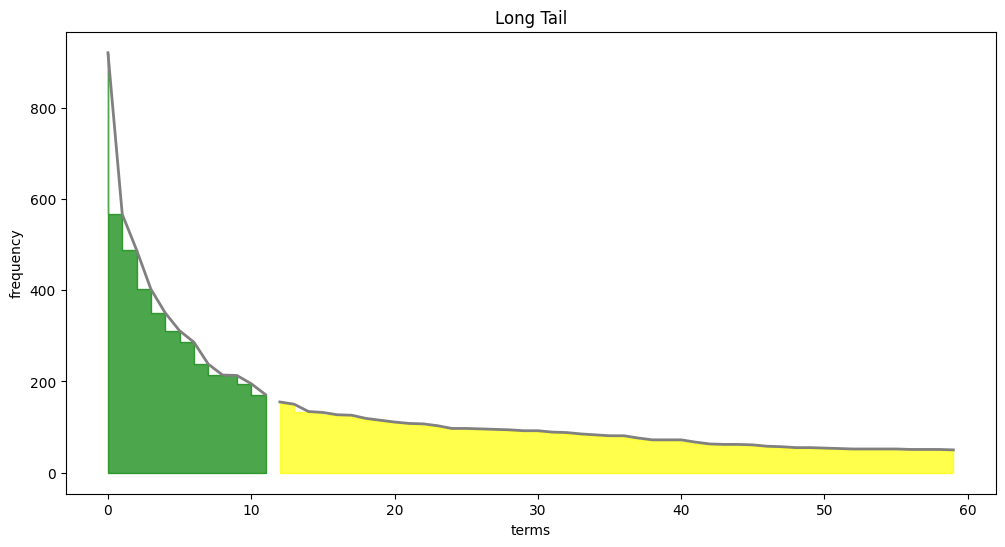

In [62]:
term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False).reset_index(drop=True)

filtered_terms = term_freq_df[term_freq_df["frequency"] >= 50]


length = len(filtered_terms)

cutoff = int(length * 0.2 )

plt.figure(figsize=(12,6))
plt.plot(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff],
                 color="green", alpha=0.7, step="pre")



plt.plot(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:],
                 color="yellow", alpha=0.7, step="pre")




plt.title("Long Tail")
plt.xlabel("terms")
plt.ylabel("frequency")
plt.show()

In [63]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

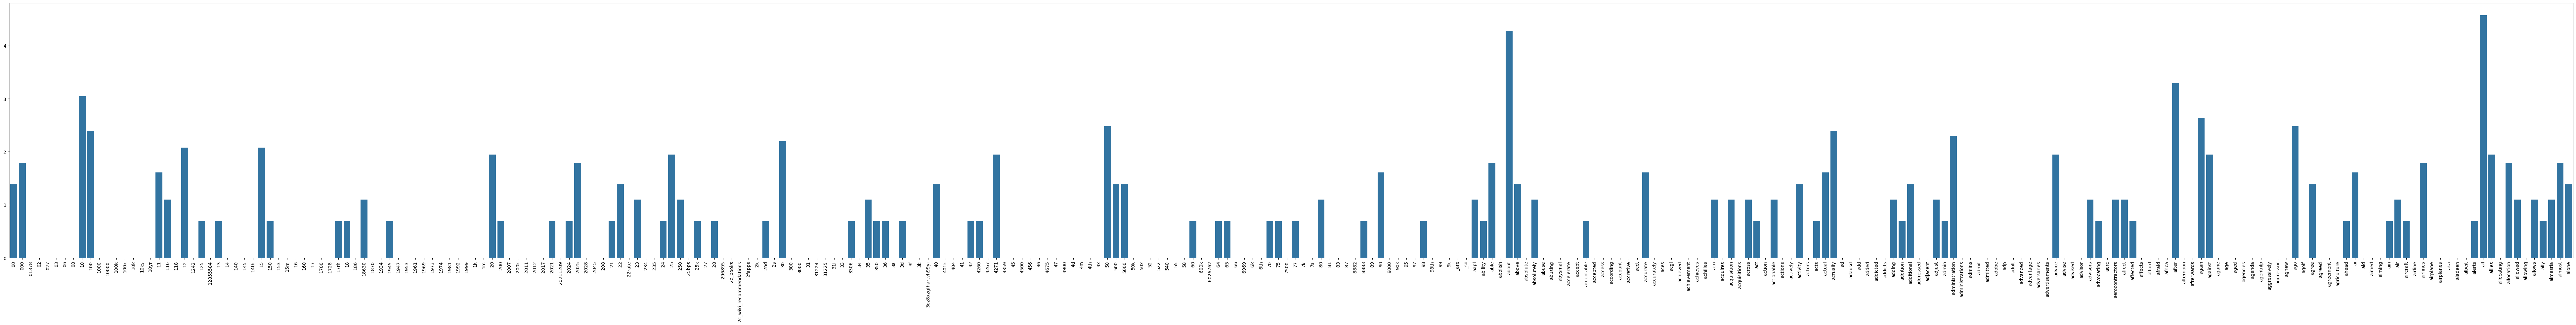

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

# Exercise 15

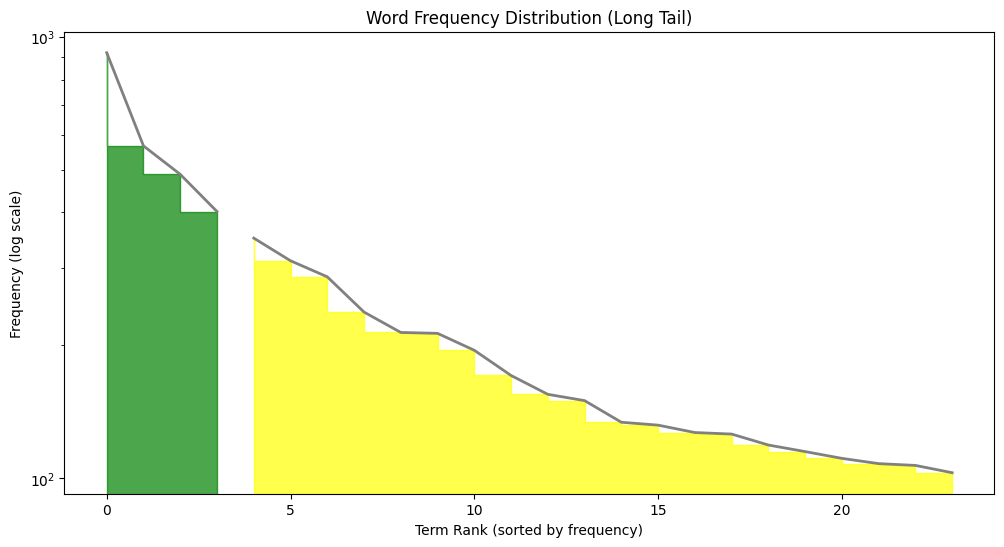

The log scale makes it easier to observe variability among less common terms, revealing a more balanced view of the vocabulary.


In [65]:
term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False).reset_index(drop=True)

filtered_terms = term_freq_df[term_freq_df["frequency"] >= 100]

length = len(filtered_terms)
cutoff = int(length * 0.2 )
plt.figure(figsize=(12,6))
plt.plot(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff],
                 color="green", alpha=0.7, step="pre")


plt.plot(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:],
                 color="yellow", alpha=0.7, step="pre")




plt.yscale("log") 
plt.title("Word Frequency Distribution (Long Tail)")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency (log scale)")
plt.show()
print("The log scale makes it easier to observe variability among less common terms, revealing a more balanced view of the vocabulary.")

(848, 2)


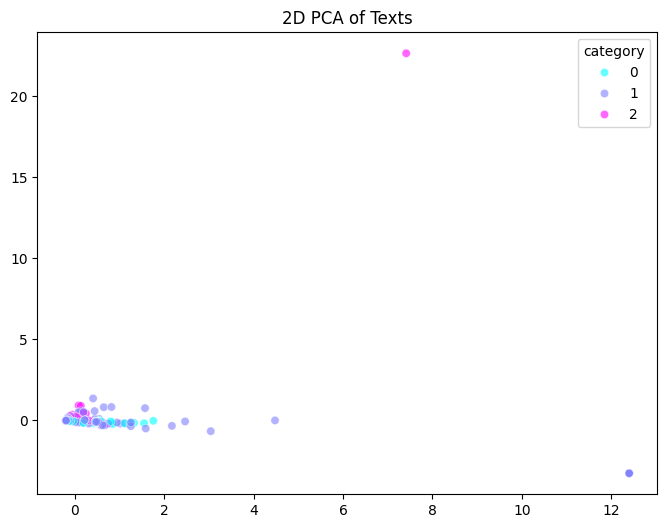

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

vect = CountVectorizer(max_features=500, stop_words="english")
X_counts = vect.fit_transform(X["text"])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_counts.toarray())
print(X_pca.shape)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X["category"], 
                palette="cool", alpha=0.6)
plt.title("2D PCA of Texts")




plt.show()

### **Phase 2** 

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['category_name'].unique()  
category_dfs = {}  

for category in categories:

    category_dfs[category] = X[X['category_name'] == category].copy()


def create_term_document_df(df):
    count_vect = CountVectorizer() 
    X_counts = count_vect.fit_transform(df['text'])  
    
 
    words = count_vect.get_feature_names_out()
    
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [68]:
category_number=0 


print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category Negative:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


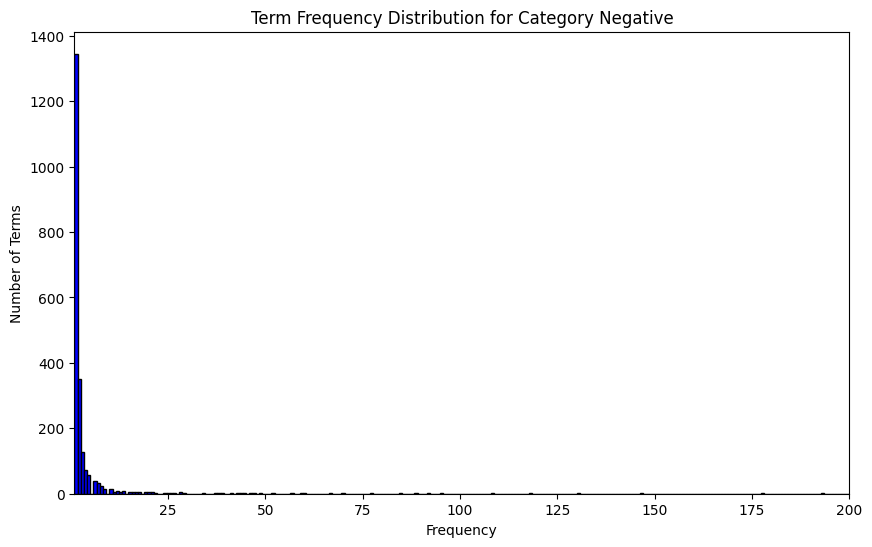

In [69]:
category_number=0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 


plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)


plt.show()

In [70]:
category_number=0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)[::-1]  
sorted_counts = np.sort(word_counts)[::-1] 

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]



print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'about', 'or', 'even', 'people', 'like', 'no', 'there', 'my', 'market', 'more', 'them', 'think', 'him', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'an', 'do', 'out', 'than', 'down', 'other', 'from', 'economy', 'up', 'tariffs', 'by', 'then', 'when', 'get', 'doing', 'over', 'some', 'who', 'don', 'been', 'trade', 'doesn', 'fuck', 'see', 'still', 'only', 'why', 'really', 'time', 'any', 'our', 'because', 'world', 'good', 'back', 'american', 'point', 'go', 'wants', 'xi', 'never', 'shit', 'much', 'most', 'your', 'me', 'literally', 'could', 'everyone', 'dollar', 'these']


In [71]:
category_number=0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)  
sorted_counts = word_counts[sorted_indices] 

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]



print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Negative
Number of terms in bottom 1%: 21
Filtered terms: ['youtube', '500', 'program', '60', '65', '6k', '6th', '77', '7s', 'programs', 'projection', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']


In [72]:
category_number=0 

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):

    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    

    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    

    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 

    return term_document_df.drop(columns=words_to_remove)


term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category Negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category Neutral we filter the following words:
Bottom 1.0% words: 
betrayals     1
profits       1
writing       1
programs      1
project       1
promising     1
wulf          1
wutang        1
promote       1
proof         1
yahoo         1
yall          1
yea           1
protect       1
protection    1
wrinkled      1
1242          1
pr

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 16

In [73]:
from PAMI.extras.convert.DF2DB import DF2DB            

for category in term_document_dfs:
    category_safe = category.replace('.', '_')
    
    obj = DF2DB(term_document_dfs[category])           
        
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


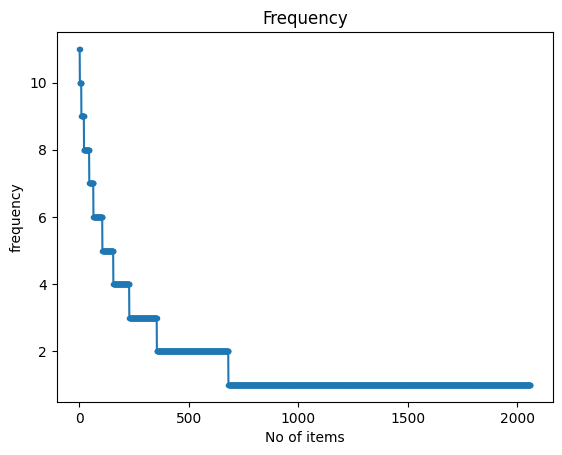

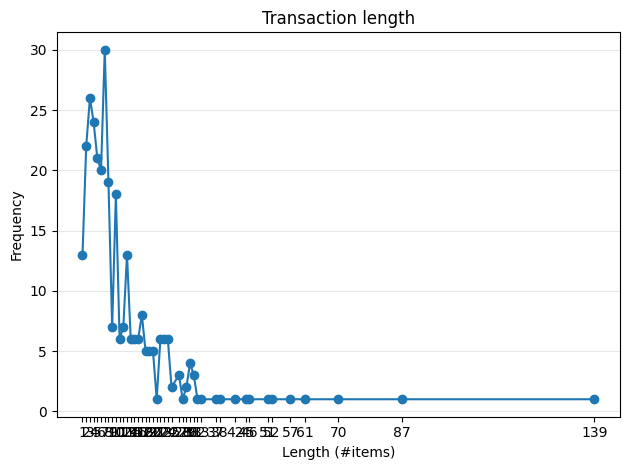

In [74]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 417
Number of items : 2587
Minimum Transaction Size : 1
Average Transaction Size : 10.767386091127099
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.22181713732704
Variance in Transaction Sizes : 332.83277992990224
Sparsity : 0.9958378870927225


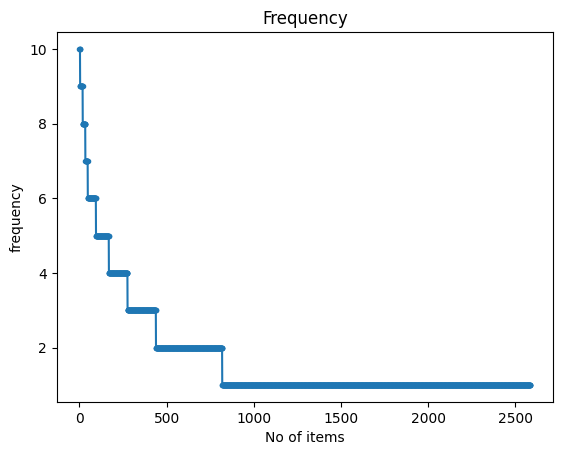

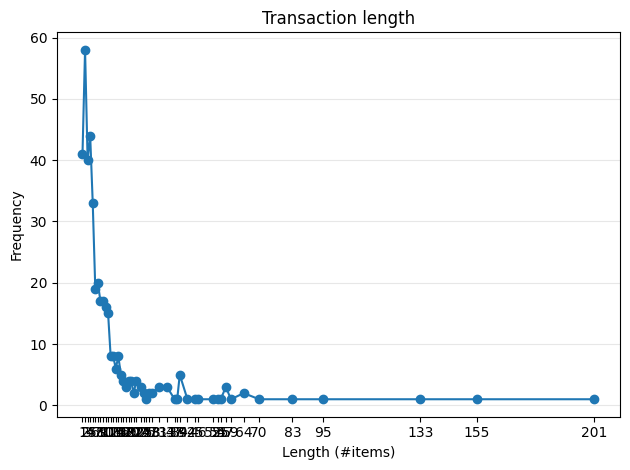

In [75]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [76]:
from PAMI.frequentPattern.basic import FPGrowth as alg
df = pd.read_csv('td_freq_db_Positive.csv', encoding='latin1')

df.to_csv('td_freq_db_Positive_u.csv', index=False, encoding='utf-8')


Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


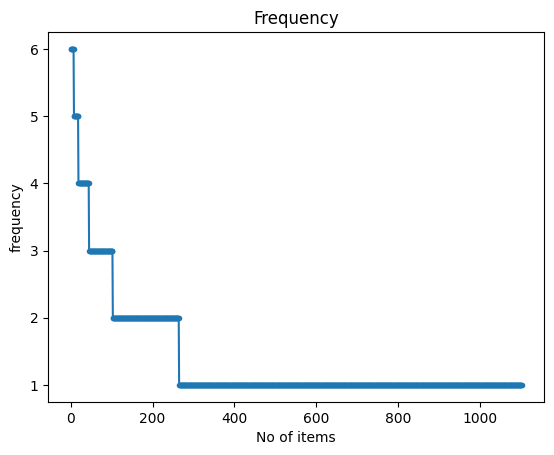

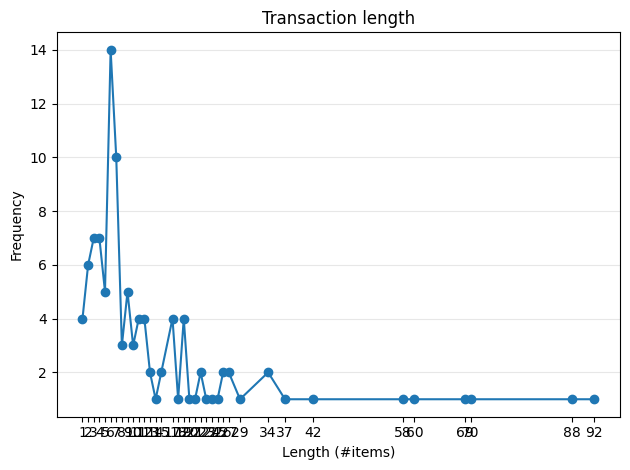

In [77]:
from PAMI.frequentPattern.basic import FPGrowth as alg
obj = tds.TransactionalDatabase('td_freq_db_Positive_u.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [78]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_Negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_Negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Negative)))
print('Runtime: ' + str(obj1.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 21
Runtime: 0.004004001617431641


In [79]:
obj1.save('freq_patterns_Negative_minSup9.txt') 
frequentPatternsDF_Negative

,Patterns,Support
0,end,9
1,right,9
2,off,9
3,seems,9
4,want,9
5,same,9
6,last,9
7,america,9
8,well,9
9,week,9


In [80]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_Neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_Neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Neutral))) 
print('Runtime: ' + str(obj2.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.004999876022338867


In [81]:
obj2.save('freq_patterns_Neutral_minSup9.txt') 
frequentPatternsDF_Neutral

,Patterns,Support
0,looking,9
1,cash,9
2,said,9
3,got,9
4,every,9
5,news,9
6,way,9
7,own,9
8,reddit,9
9,long,9


In [82]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_Positive_u.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_Positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Positive))) 
print('Runtime: ' + str(obj3.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.002010345458984375


In [83]:
obj3.save('freq_patterns_Positive_minSup9.txt')
frequentPatternsDF_Positive

,Patterns,Support


In [84]:
import pandas as pd

dfs = [frequentPatternsDF_Negative, frequentPatternsDF_Neutral, frequentPatternsDF_Positive]


pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)


filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)


final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)


final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)


print(final_pattern_df)

print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
19    after      11
18  already      11
11   things      10
36     most      10
35      let      10
17    again      10
16      bad      10
15   should      10
14     sure      10
13      day      10
12     here      10
37      his      10
10    great       9
9      into       9
2       off       9
3     seems       9
34      few       9
33       am       9
32       ll       9
31   weekly       9
30    still       9
29     long       9
28   reddit       9
27      own       9
26      way       9
25     news       9
24    every       9
23      got       9
22     said       9
21     cash       9
20  looking       9
1     right       9
4      want       9
5      same       9
6      last       9
7   america       9
8      week       9
0       end       9
Number of patterns discarded: 2


In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text']) 
terms = count_vect.get_feature_names_out()  

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])


for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)


tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)


augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)



augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,said,cash,looking,right,want,same,last,america,week,end
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 17

In [86]:
from time import perf_counter
try:
    from PAMI.frequentPattern.topk import FAE as fae_mod
except Exception:
    from PAMI.frequentPattern import FAE as fae_mod 

try:
    from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp_mod
except Exception:
    from PAMI.frequentPattern import MaxFPGrowth as maxfp_mod 
comp_graphics_file = 'td_freq_db_Negative.csv'

def run_fae_topk(iFile, k):
    FAEClass = getattr(fae_mod, 'FAE', fae_mod)
    alg = FAEClass(iFile=iFile, k=k)
    t0 = perf_counter()
    alg.mine()
    runtime = perf_counter() - t0
    df = alg.getPatternsAsDataFrame()
    return df, runtime

fae_results = []

for k in [50, 100, 150]:
    df_k, rt_k = run_fae_topk(comp_graphics_file, k)
    fae_results.append({
        'algo': 'FAE-TopK',
        'setting': f'k={k}',
        'num_patterns': len(df_k),
        'runtime_s': rt_k,
        'df': df_k
    })
    print(f'Total No of patterns={k} \npatterns={len(df_k)} \nruntime={rt_k:.4f}s')
    display(df_k.tail(10))  

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns=50 
patterns=50 
runtime=0.0205s


,Patterns,Support
40,where,8
41,anything,8
42,ever,8
43,take,8
44,worse,8
45,didn,7
46,long,7
47,believe,7
48,big,7
49,bonds,7


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns=100 
patterns=100 
runtime=0.0252s


,Patterns,Support
90,life,6
91,puts,6
92,both,6
93,come,6
94,years,6
95,face,6
96,ll,6
97,went,6
98,administration,6
99,every,6


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns=150 
patterns=150 
runtime=0.0214s


,Patterns,Support
140,person,5
141,president,5
142,worst,5
143,chinese,5
144,love,5
145,care,5
146,own,5
147,something,5
148,use,5
149,dude,5


For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well.

In [87]:
try:
    from PAMI.frequentPattern.basic.FPGrowth import FPGrowth as FPGrowthAlg
except ImportError:
    from PAMI.frequentPattern.basic import FPGrowth as FPGrowthAlg

def run_maxfpgrowth(iFile, minSup):
    MaxFPClass = getattr(maxfp_mod, 'MaxFPGrowth', maxfp_mod)
    alg = MaxFPClass(iFile=iFile, minSup=minSup)
    t0 = perf_counter()
    alg.mine()
    runtime = perf_counter() - t0
    df = alg.getPatternsAsDataFrame()
    return df, runtime

maxfp_results = []

for ms in [3, 6, 9]:
    df_ms, rt_ms = run_maxfpgrowth(comp_graphics_file, ms)
    maxfp_results.append({
        'algo': 'MaxFPGrowth',
        'setting': f'minSup={ms}',
        'num_patterns': len(df_ms),
        'runtime_s': rt_ms,
        'df': df_ms
    })
    print(f'minSup={ms} \npatterns={len(df_ms)} \nruntime={rt_ms:.4f}s')
    display(df_ms.head(10))

def run_fpgrowth(iFile, minSup):
    alg = FPGrowthAlg(iFile=iFile, minSup=minSup)
    t0 = perf_counter()
    alg.mine()
    runtime = perf_counter() - t0
    df = alg.getPatternsAsDataFrame()
    return df, runtime

fp_results = []

for ms in [3, 6, 9]:
    df_ms, rt_ms = run_fpgrowth(comp_graphics_file, ms)
    fp_results.append({
        'algo': 'FPGrowth',
        'setting': f'minSup={ms}',
        'num_patterns': len(df_ms),
        'runtime_s': rt_ms,
        'df': df_ms
    })
    print(f'minSup={ms} \npatterns={len(df_ms)} \nruntime={rt_ms:.4f}s')
    display(df_ms.head(10))

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=3 
patterns=333 
runtime=0.0375s


,Patterns,Support
0,being,3
1,leader,3
2,remember,3
3,fair,3
4,beyond,3
5,biden,3
6,stable,3
7,el,3
8,thanks,3
9,give,3


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=6 
patterns=105 
runtime=0.0207s


,Patterns,Support
0,gonna,6
1,trading,6
2,lost,6
3,silver,6
4,though,6
5,every,6
6,administration,6
7,went,6
8,ll,6
9,face,6


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=9 
patterns=21 
runtime=0.0226s


,Patterns,Support
0,great,9
1,into,9
2,week,9
3,well,9
4,america,9
5,last,9
6,same,9
7,want,9
8,seems,9
9,off,9


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=3 
patterns=400 
runtime=0.0274s


,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
5,am,3
6,forward,3
7,hard,3
8,place,3
9,used,3


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=6 
patterns=105 
runtime=0.0216s


,Patterns,Support
0,calls,6
1,companies,6
2,lot,6
3,next,6
4,first,6
5,actually,6
6,its,6
7,retard,6
8,trying,6
9,guy,6


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=9 
patterns=21 
runtime=0.0185s


,Patterns,Support
0,end,9
1,right,9
2,off,9
3,seems,9
4,want,9
5,same,9
6,last,9
7,america,9
8,well,9
9,week,9


In [88]:
summary_rows = []
for r in fae_results + maxfp_results + fp_results:
    summary_rows.append({
        'algo': r['algo'],
        'setting': r['setting'],
        'num_patterns': r['num_patterns'],
        'runtime_s': r['runtime_s']
    })

summary_df = pd.DataFrame(summary_rows)
summary_df

,algo,setting,num_patterns,runtime_s
0,FAE-TopK,k=50,50,0.020503
1,FAE-TopK,k=100,100,0.025243
2,FAE-TopK,k=150,150,0.021439
3,MaxFPGrowth,minSup=3,333,0.037550
4,MaxFPGrowth,minSup=6,105,0.020707
5,MaxFPGrowth,minSup=9,21,0.022630
6,FPGrowth,minSup=3,400,0.027379
7,FPGrowth,minSup=6,105,0.021586
8,FPGrowth,minSup=9,21,0.018495


FAE Top-K The runtime is almost constant Increasing K only affects how many patterns are output, not significantly the computation time. 
Top frequent patterns are consistent across runs MaxFPGrowth As minSup increases, both runtime and number of patterns decrease dramatically. Memory usage remains fairly stable dominated by dataset representation overhead. 
Comparing: Runtime scaling FAE: Relatively constant with K MaxFPGrowth: Strongly affected by minSup

In [89]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt





X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [90]:
X_pca_tdm.shape

(848, 2)

In [91]:
X_tsne_tdm.shape

(848, 2)

In [92]:
X_umap_tdm.shape

(848, 2)

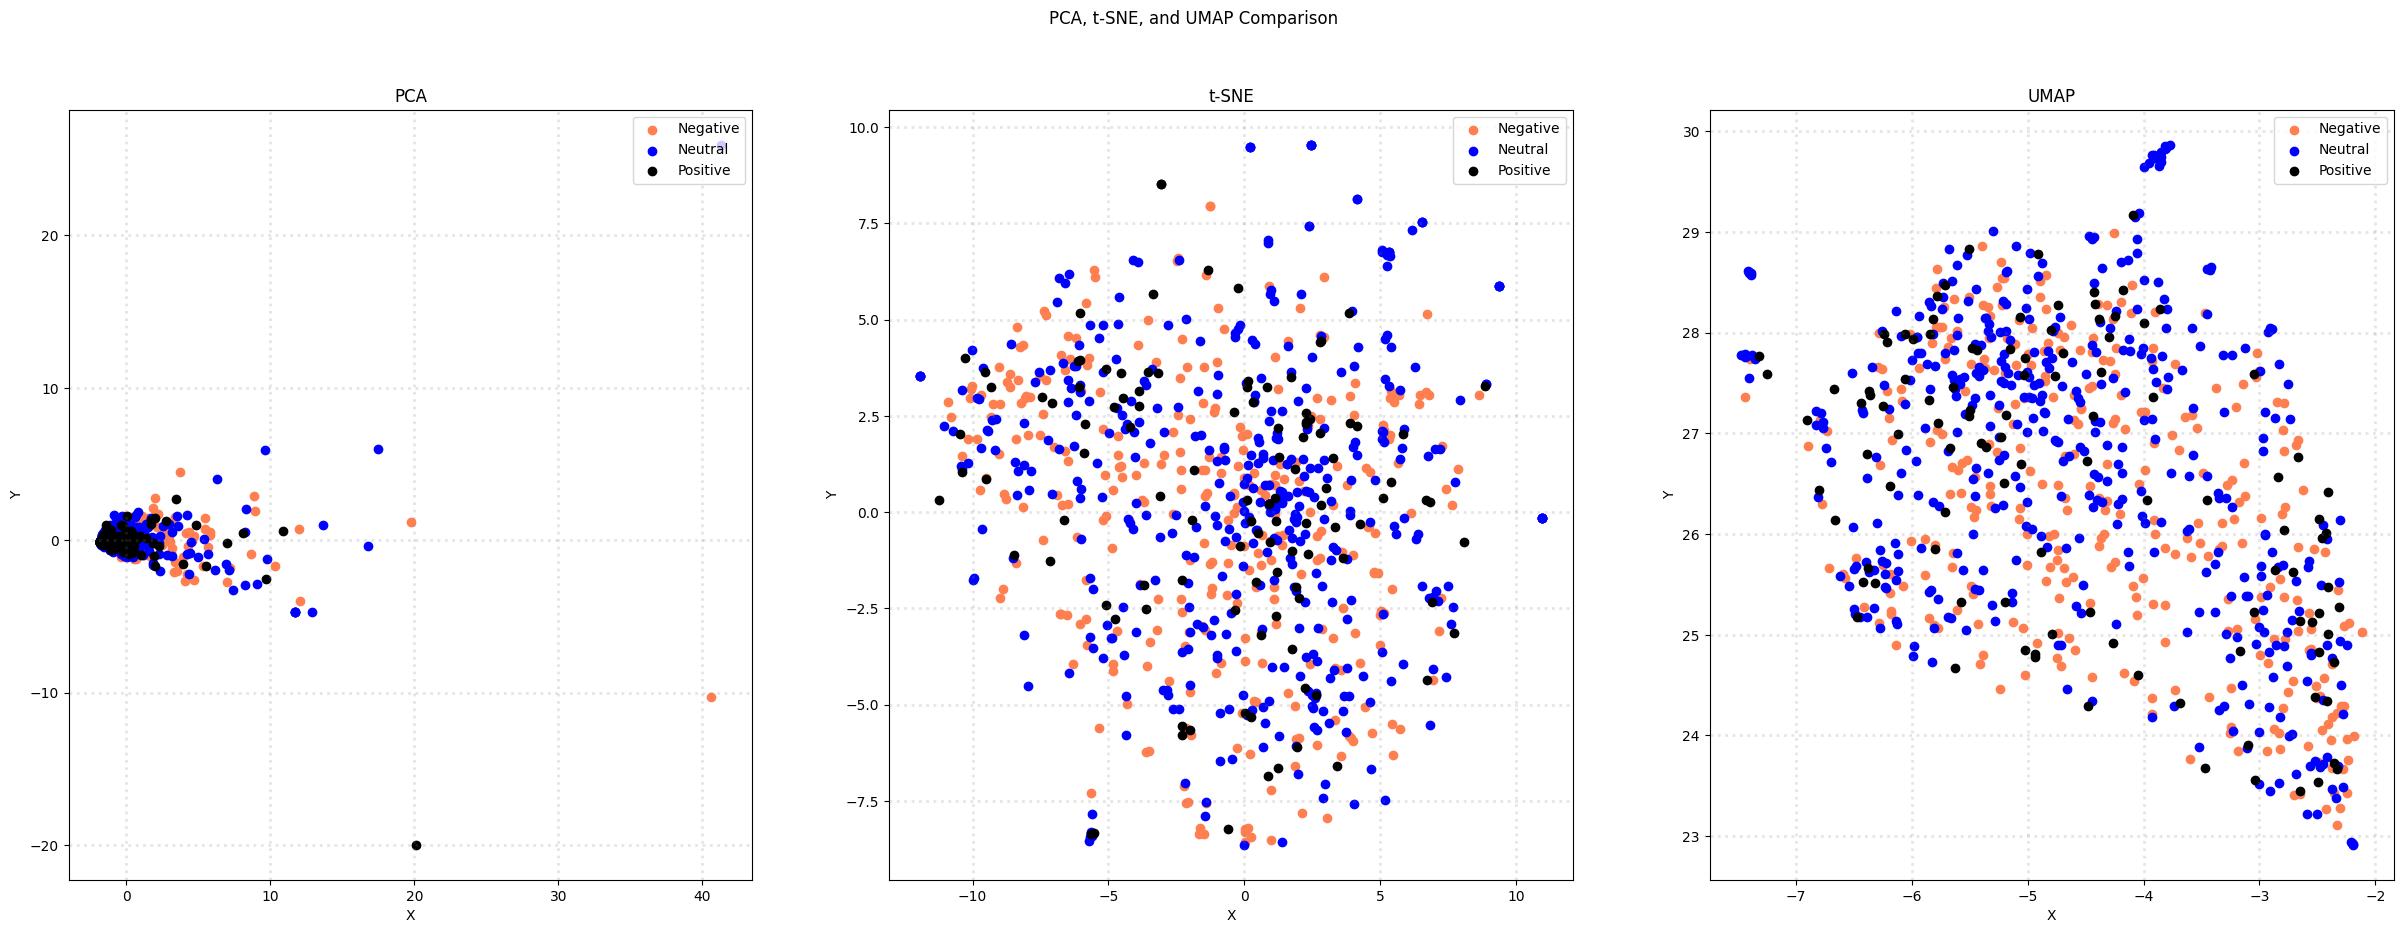

In [93]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0] 
        ys = X_reduced[X['category_name'] == category].T[1] 
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [94]:

X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

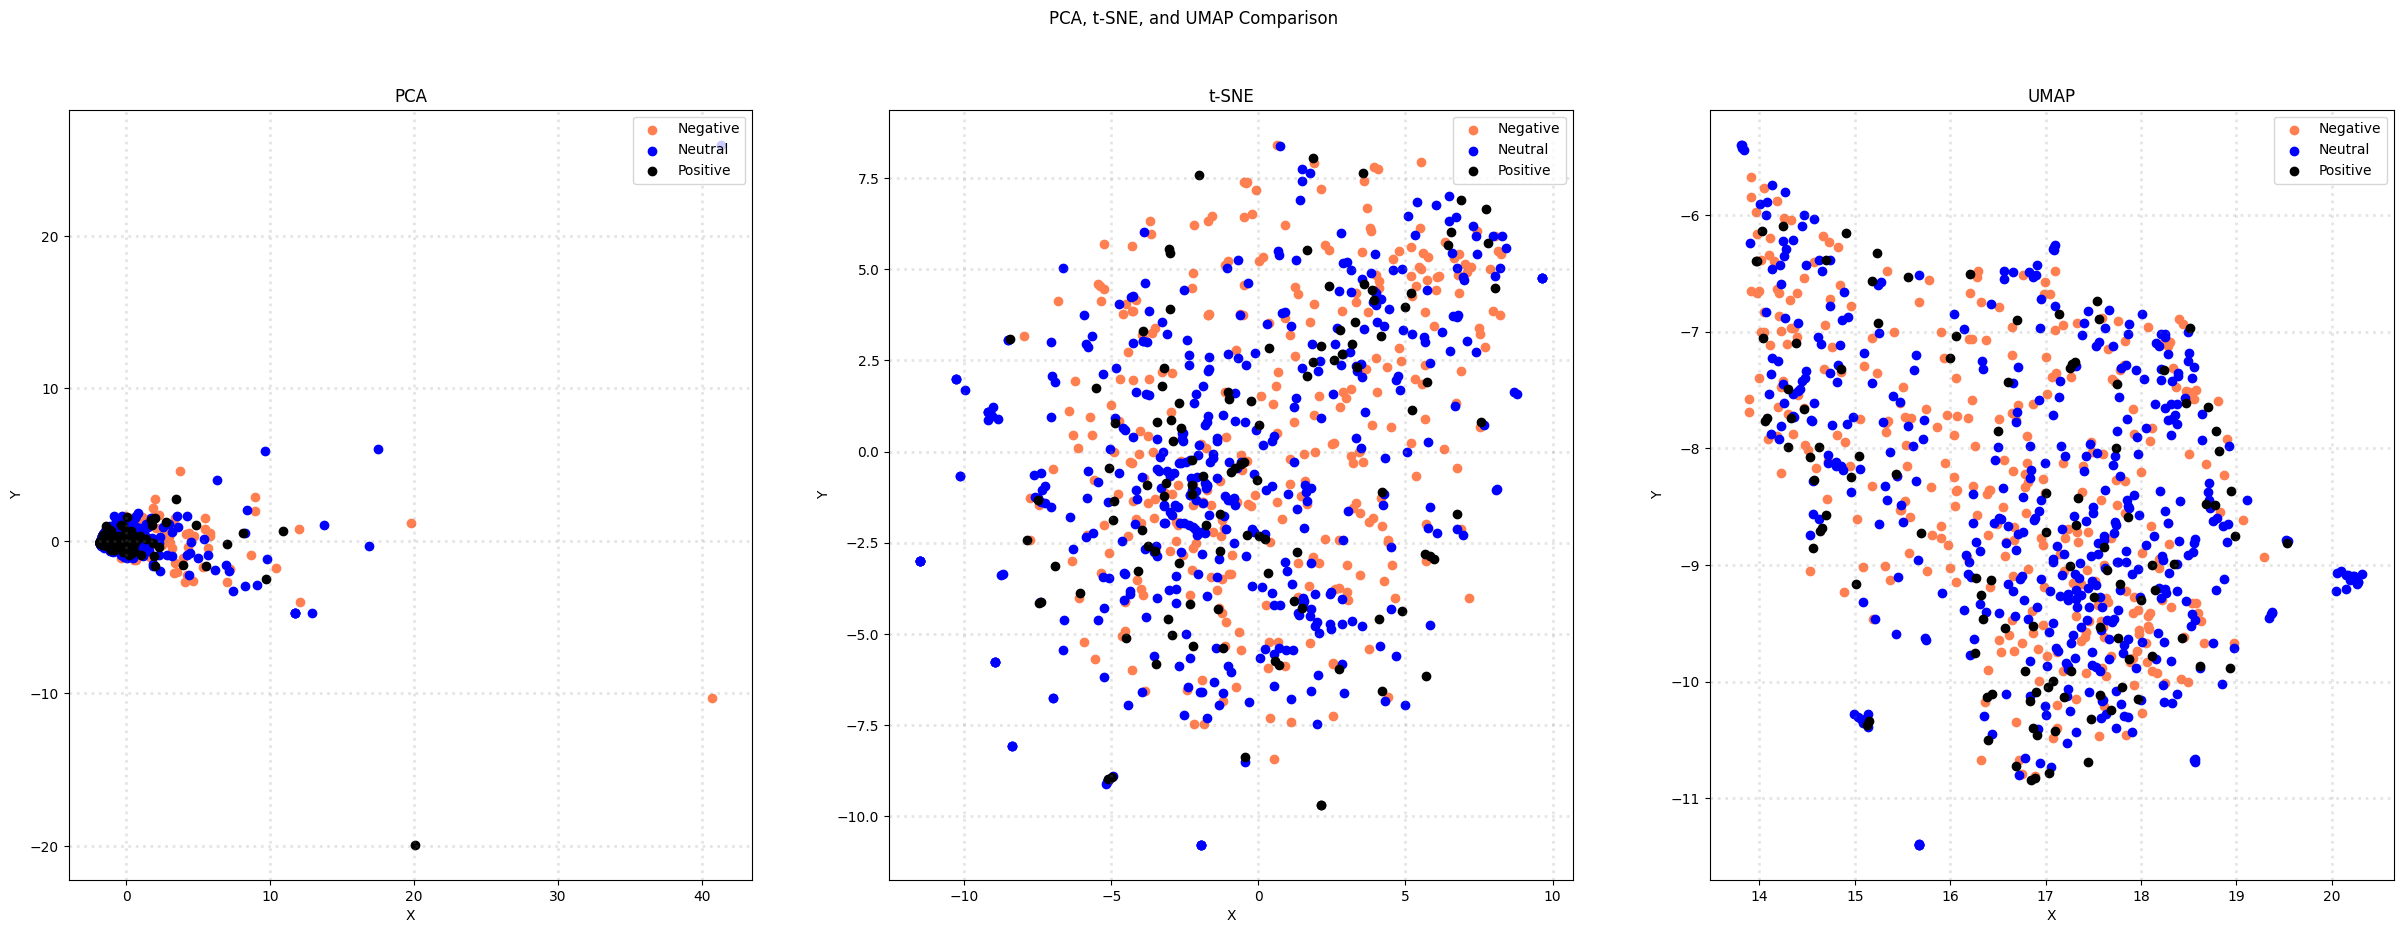

In [95]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')





plt.show()

# Exercise 18

c:\Users\pablo\OneDrive\Desktop\Master AI\Data mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



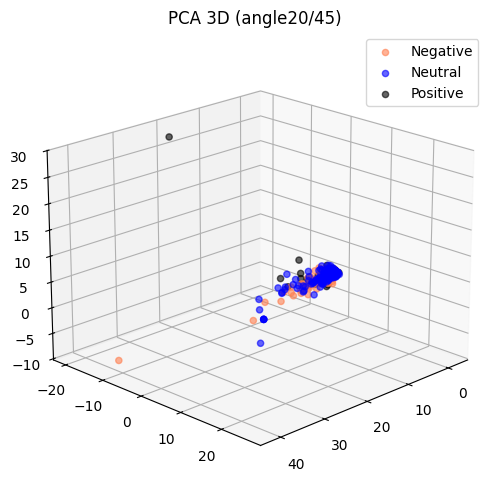

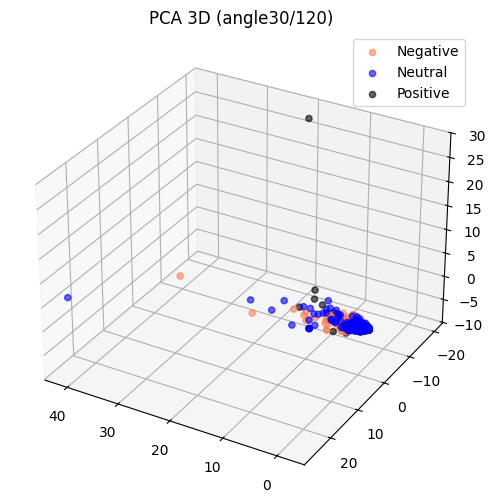

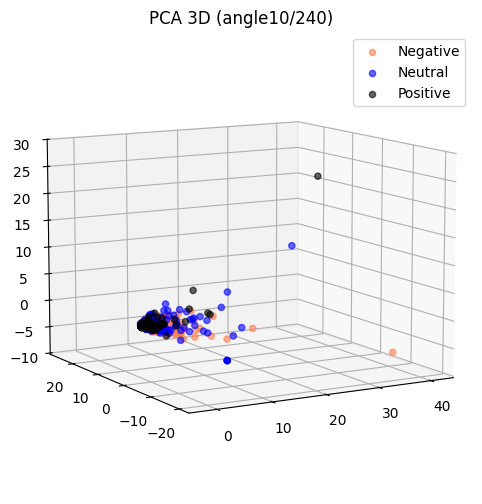

In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()


def plot_3d(X_reduced, labels, title, elev, azim):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    for c, category in zip(col, categories):
        idx = labels == category
        ax.scatter(X_reduced[idx,0], X_reduced[idx,1], X_reduced[idx,2], 
                   label=category, alpha=0.6, s=20, c=c)
    ax.view_init(elev=elev, azim=azim)   
    ax.set_title(f"{title} (angle{elev}/{azim})")
    ax.legend()
    plt.show()


plot_3d(X_pca_3d, X['category_name'].values, "PCA 3D", elev=20, azim=45)
plot_3d(X_pca_3d, X['category_name'].values, "PCA 3D", elev=30, azim=120)
plot_3d(X_pca_3d, X['category_name'].values, "PCA 3D", elev=10, azim=240)

In [97]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [98]:
mlb = preprocessing.LabelBinarizer()

In [99]:
mlb.fit(X.category)

LabelBinarizer()

In [100]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [101]:

X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category
0,Calls on retards,0,Negative,"[Calls, on, retards]","{Calls, retards, on}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1,Neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{it, starting, ever., company, as, like, first...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,1,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{of, lots, the, ticker., Seeing, in, red}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{Inc., new, 116, this, Torrente., your, waterc...","[0, 0, 1]"
4,He didn’t say thank you.,0,Negative,"[He, didn, ’, t, say, thank, you, .]","{say, He, thank, didn’t, you.}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Neutral,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{tonight,, Hoping, puss, wish, wet, to, warm, ...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,0,Negative,"[Trump, will, respond, to, china, increasing, ...","{are, going, it, fire, all, think, personally,...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1,Neutral,"[Confirmed, not, a, trap, ., Its, been, like, ...","{of, it, just, this, months,, we, probably, tr...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,2,Positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{new, held, Follow, on, base, one, handle, Thi...","[0, 0, 1]"


# Exercise 19

In [102]:

from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
y_bin = mlb.fit_transform(X['category_name'])

X['bin_category_name'] = y_bin.tolist()

print(mlb.classes_)   
X[0:9]

['Negative' 'Neutral' 'Positive']


,text,category,category_name,unigrams,tokenized_text,bin_category,bin_category_name
0,Calls on retards,0,Negative,"[Calls, on, retards]","{Calls, retards, on}","[1, 0, 0]","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1,Neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{it, starting, ever., company, as, like, first...","[0, 1, 0]","[0, 1, 0]"
2,Seeing lots of red in the ticker.,1,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{of, lots, the, ticker., Seeing, in, red}","[0, 1, 0]","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{Inc., new, 116, this, Torrente., your, waterc...","[0, 0, 1]","[0, 0, 1]"
4,He didn’t say thank you.,0,Negative,"[He, didn, ’, t, say, thank, you, .]","{say, He, thank, didn’t, you.}","[1, 0, 0]","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Neutral,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{tonight,, Hoping, puss, wish, wet, to, warm, ...","[0, 1, 0]","[0, 1, 0]"
6,Trump will respond to china increasing their t...,0,Negative,"[Trump, will, respond, to, china, increasing, ...","{are, going, it, fire, all, think, personally,...","[1, 0, 0]","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1,Neutral,"[Confirmed, not, a, trap, ., Its, been, like, ...","{of, it, just, this, months,, we, probably, tr...","[0, 1, 0]","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,2,Positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{new, held, Follow, on, base, one, handle, Thi...","[0, 0, 1]","[0, 0, 1]"


In [103]:
print('Yes, it works perfectly as long as it is a single categorical label per row,\nnote that LabelBinarizer is designed for single-label classification — one label per sample')

Yes, it works perfectly as long as it is a single categorical label per row,
note that LabelBinarizer is designed for single-label classification — one label per sample


In [104]:

document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[20]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[30]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [105]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Nooo dont go down its smug bull day']
['> Still seems like an awful investment\r \r That sentiment, above everything else happening, is what has me most terrified.\r \r Faith in the US economy is crumbling.']


In [106]:
from sklearn.preprocessing import binarize


document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)


document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)




print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

# Exercise 20

In [108]:
from sklearn.preprocessing import binarize


document_to_transform_4 = [X.iloc[5]['text']]
document_to_transform_5 = [X.iloc[30]['text']]
document_to_transform_6 = [X.iloc[200]['text']]


document_vector_count_4 = count_vect.transform(document_to_transform_4)
document_vector_count_5 = count_vect.transform(document_to_transform_5)
document_vector_count_6 = count_vect.transform(document_to_transform_6)


document_vector_count_1_bin = binarize(document_vector_count_4)
document_vector_count_2_bin = binarize(document_vector_count_5)
document_vector_count_3_bin = binarize(document_vector_count_6)



print("Let's take a look at the count vectors:")
print(document_vector_count_4.todense())
print(document_vector_count_5.todense())
print(document_vector_count_6.todense())

from sklearn.metrics.pairwise import cosine_similarity


cos_sim_count_4_5 = cosine_similarity(document_vector_count_4, document_vector_count_5, dense_output=True)
cos_sim_count_4_6 = cosine_similarity(document_vector_count_4, document_vector_count_6, dense_output=True)
cos_sim_count_5_6 = cosine_similarity(document_vector_count_5, document_vector_count_6, dense_output=True)

cos_sim_count_4_4 = cosine_similarity(document_vector_count_4, document_vector_count_4, dense_output=True)
cos_sim_count_5_5 = cosine_similarity(document_vector_count_5, document_vector_count_5, dense_output=True)
cos_sim_count_6_6 = cosine_similarity(document_vector_count_6, document_vector_count_6, dense_output=True)





print("Cosine Similarity using count bw 4 and 5: %(x)f" %{"x":cos_sim_count_4_5})
print("Cosine Similarity using count bw 4 and 6: %(x)f" %{"x":cos_sim_count_4_6})
print("Cosine Similarity using count bw 5 and 6: %(x)f" %{"x":cos_sim_count_5_6})

print("Cosine Similarity using count bw 4 and 4: %(x)f" %{"x":cos_sim_count_4_4})
print("Cosine Similarity using count bw 5 and 5: %(x)f" %{"x":cos_sim_count_5_5})
print("Cosine Similarity using count bw 6 and 6: %(x)f" %{"x":cos_sim_count_6_6})

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 4 and 5: 0.116052
Cosine Similarity using count bw 4 and 6: 0.090453
Cosine Similarity using count bw 5 and 6: 0.327165
Cosine Similarity using count bw 4 and 4: 1.000000
Cosine Similarity using count bw 5 and 5: 1.000000
Cosine Similarity using count bw 6 and 6: 1.000000


C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\3889977414.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\3889977414.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\3889977414.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\pablo\AppData\Local\Temp\ipykernel_25948\3889977414.py:44: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [109]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [110]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5647058823529412

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5039    0.7529    0.6038        85
     Neutral     0.6667    0.5926    0.6275       135
    Positive     0.0000    0.0000    0.0000        35

    accuracy                         0.5647       255
   macro avg     0.3902    0.4485    0.4104       255
weighted avg     0.5209    0.5647    0.5334       255



# Exercise 21

In [113]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = nb_classifier_aug.predict(X_test_aug)

print("Accuracy with augmented data:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (with augmented data):\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy with augmented data: 0.5764705882352941

Classification Report (with augmented data):
               precision    recall  f1-score   support

    Negative     0.5203    0.7529    0.6154        85
     Neutral     0.6694    0.6148    0.6409       135
    Positive     0.0000    0.0000    0.0000        35

    accuracy                         0.5765       255
   macro avg     0.3966    0.4559    0.4188       255
weighted avg     0.5278    0.5765    0.5444       255



# Exercise 22

In [114]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5000    0.4000    0.4444        85
     Neutral     0.5988    0.7185    0.6532       135
    Positive     0.2000    0.1429    0.1667        35

    accuracy                         0.5333       255
   macro avg     0.4329    0.4205    0.4214       255
weighted avg     0.5111    0.5333    0.5168       255



# Exercise 24

In [115]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, 
    X['category'], 
    test_size=0.3, 
    random_state=42
)

dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)



print("Decision Tree Accuracy (Augmented Data):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

Decision Tree Accuracy (Augmented Data): 0.5882352941176471

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5696    0.5294    0.5488        85
     Neutral     0.6335    0.7556    0.6892       135
    Positive     0.2000    0.0857    0.1200        35

    accuracy                         0.5882       255
   macro avg     0.4677    0.4569    0.4527       255
weighted avg     0.5527    0.5882    0.5643       255

